![example](images/director_shot.jpeg)

# Microsoft New Movie Studio

**Authors:** Monique Hercules 
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This project analyzes the movie industry to gain insight in what it takes to not just make a movie but make a successful movie that stands the weight of time.From the insights gathered we will be able to create a template create a successful new movie studio.

The new studio can use this information to predict the best production budget, genre and best practices needed make a successful movie studio. 

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

The creation of a new movie studio is a daunting task but with the data analysis from --- and profit projections. We can determine the first few movies we need to make to be profitable immediately, while building rapport in the movie studio industry. 

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

Importing all revelant libraries to analyze the dataframes

In [60]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imported all the dataframes to explore information contained in each 

In [61]:
#Exploring all the dataframes

In [62]:
movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', index_col = 0)
movie_gross_df = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')
rotten_tomatoes_movies_df = pd.read_csv('data/zippeddata/rt.movie_info.tsv.gz', delimiter = '\t')
rotten_tomatoes_reviews_df = pd.read_csv('data/zippeddata/rt.reviews.tsv.gz', encoding = 'unicode_escape', delimiter = '\t')
Imdb_movies_df = pd.read_csv('data/zippeddata/tmdb.movies.csv.gz', index_col = 0)
Imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
Imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
Imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
Imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
Imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
Imdb_name_basics_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')



Exploration of each dataframe to have a comprenhensive idea of each dataframe as a whole 

In [63]:
movie_budgets_df.head()#use this for first question. Merge two tables together 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [64]:
movie_gross_df.head()#Use this for first question 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [324]:
rotten_tomatoes_movies_df.head()

,id,synopsis,content_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [325]:
rotten_tomatoes_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [326]:
Imdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [327]:
Imdb_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [328]:
Imdb_title_ratings_df.head()#Probably won't need 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [329]:
Imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [330]:
Imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [331]:
Imdb_title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [332]:
Imdb_name_basics_df.head() #Probably won't need 

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [333]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [334]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [336]:
rotten_tomatoes_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1560 non-null   int64 
 1   synopsis        1498 non-null   object
 2   content_rating  1557 non-null   object
 3   genre           1552 non-null   object
 4   director        1361 non-null   object
 5   writer          1111 non-null   object
 6   theater_date    1201 non-null   object
 7   dvd_date        1201 non-null   object
 8   currency        340 non-null    object
 9   box_office      340 non-null    object
 10  runtime         1530 non-null   object
 11  studio          494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [77]:
rotten_tomatoes_reviews_df.info

<bound method DataFrame.info of          id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000                                                NaN    3/5   fresh

In [78]:
rotten_tomatoes_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [337]:
Imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [338]:
Imdb_title_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [81]:
Imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [82]:
Imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [83]:
Imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [84]:
Imdb_title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [85]:
Imdb_name_basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [86]:
movie_budgets_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [87]:
movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [88]:
rotten_tomatoes_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [91]:
rotten_tomatoes_reviews_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [92]:
Imdb_movies_df.columns 

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [93]:
Imdb_title_principals_df.columns 

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')

In [94]:
Imdb_title_ratings_df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [95]:
Imdb_title_crew_df.columns 

Index(['tconst', 'directors', 'writers'], dtype='object')

In [96]:
Imdb_title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [97]:
Imdb_title_akas_df.columns 

Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [98]:
Imdb_name_basics_df.columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

A few variables were created to assist in finding the profit margin while also considering inflation.

Inflation was taken in consideration to make the production cost and profit applicable to the current market 



The variables movie_budget_and_profit_df was created to merge together the production costs and profit from world-wide gross. 



In [40]:
movie_budgets_df = movie_budgets_df.rename(columns ={'movie': 'title'})
#Changing the name of the 'movie' to 'title' 

Changing the name of "movie" to "title" in the dataframe, to merge the dataframes movie_budgets_df and movie_gross_df.This will place the movies all together in one column for easy reference. 

In [41]:
movie_budget_and_profit_df = movie_budgets_df.merge(movie_gross_df, on= 'title' )
movie_budget_and_profit_df.head()
#Merging the dataframes together for all the budgets and profits 

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011
1,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000,2015
2,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,"1,369.5",2018
3,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000,2017
4,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Sony,200100000.0,680600000,2015


Merging together the dataframes, to have the movies production cost and worldwide gross all together with the corresponding movie name. 

In [42]:
#Convert the merged dataframe budget column into ints 
movie_budget_and_profit_df[movie_budget_and_profit_df.columns[2:]]=  movie_budget_and_profit_df[movie_budget_and_profit_df.columns[2:]].replace('[\$|,]','',regex= True)
print(movie_budget_and_profit_df[movie_budget_and_profit_df.columns[2:]])
                                 

     production_budget domestic_gross_x worldwide_gross   studio  \
0            410600000        241063875      1045663875       BV   
1            330600000        459005868      1403013963       BV   
2            300000000        678815482      2048134200       BV   
3            300000000        229024295       655945209       WB   
4            300000000        200074175       879620923     Sony   
...                ...              ...             ...      ...   
1242            135000           408015          429448     FoxS   
1243            120000          1597486         3090593      IFC   
1244            100000         22764410        41656474  WB (NL)   
1245            100000          1594798         2769782      A24   
1246             50000           391674          424149      IFC   

      domestic_gross_y foreign_gross  year  
0          241100000.0     804600000  2011  
1          459000000.0     946400000  2015  
2          678800000.0        1369.5  2018  
3  

Changed the numbers in the dataframe movie_budget_and_profit_df from objects with to ints. 

In [106]:
movie_budget_and_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   release_date             1247 non-null   object 
 1   title                    1247 non-null   object 
 2   production_budget        1247 non-null   int64  
 3   domestic_gross_x         1247 non-null   object 
 4   worldwide_gross          1247 non-null   int64  
 5   studio                   1246 non-null   object 
 6   domestic_gross_y         1245 non-null   float64
 7   foreign_gross            1086 non-null   object 
 8   year                     1247 non-null   int64  
 9   Profit                   1247 non-null   int64  
 10  Profit_Margin            1247 non-null   float64
 11  inflation_budget         1247 non-null   float64
 12  profit_inflation_budget  1247 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 136.4+ KB


Now that the objects in the dataframe has been changed to integers I can subtract the production_budget column from the worldwide_gross column to produce. 

Converted the columns to be the same from subtraction. 

In [107]:
movie_budget_and_profit_df['production_budget'] = movie_budget_and_profit_df['production_budget'].astype(str).astype(int)


In [108]:
movie_budget_and_profit_df['worldwide_gross'] = movie_budget_and_profit_df['worldwide_gross'].astype(str).astype(int)


In [341]:
movie_budget_and_profit_df['Profit'] = movie_budget_and_profit_df['worldwide_gross'] - movie_budget_and_profit_df['production_budget']
movie_budget_and_profit_df.head()

# created the profit variable because I wanted to find the most profitable movies.


,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875,0.607331,689808000.0,1.066907e+09
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,465484800.0,1.509959e+09
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209,0.542645,381600000.0,4.527623e+08
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923,0.658944,422400000.0,8.161063e+08


In [340]:
movie_budget_and_profit_df.sort_values('Profit')

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
107,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,BV,21400000.0,17600000,2011,-110450242,-2.792691,252000000.0,-1.855564e+08
208,"Nov 24, 2010",The Nutcracker in 3D,90000000,195459,20466016,Free,195000.0,16000000,2010,-69533984,-3.397534,157320000.0,-1.215454e+08
147,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,Par.,33400000.0,31100000,2017,-63357202,-1.027812,159000000.0,-8.059036e+07
137,"Jul 19, 2013",R.I.P.D.,130000000,33618855,79076678,Uni.,33600000.0,44700000,2013,-50923322,-0.643974,200720000.0,-7.862561e+07
265,"Jan 16, 2015",Blackhat,70000000,8005980,19665004,Uni.,8000000.0,11600000,2015,-50334996,-2.559623,98560000.0,-7.087167e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,Uni.,417700000.0,891800000,2018,1135772799,0.869809,204680000.0,1.367470e+09
25,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,BV,700100000.0,646900000,2018,1148258224,0.851660,240800000.0,1.382503e+09
40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,1328722794,0.874895,267520000.0,1.870842e+09
21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,1433854864,0.869606,302720000.0,2.018868e+09


Created the Profit_Margin variable to store the profit margin from the production costs vs the worldwide_gross 

In [342]:
movie_budget_and_profit_df['Profit_Margin'] = (movie_budget_and_profit_df['worldwide_gross'] - movie_budget_and_profit_df['production_budget'])/movie_budget_and_profit_df['worldwide_gross']
movie_budget_and_profit_df.head()



,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875,0.607331,689808000.0,1.066907e+09
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,465484800.0,1.509959e+09
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209,0.542645,381600000.0,4.527623e+08
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923,0.658944,422400000.0,8.161063e+08


Accounted for current day inflation at 6.8%  for both the production budget and the profit 

In [343]:
movie_budget_and_profit_df['inflation_budget'] = ((((2021 - movie_budget_and_profit_df['year']) * .068 )+1)*
                                                movie_budget_and_profit_df['production_budget'])
movie_budget_and_profit_df['profit_inflation_budget'] =  ((((2021 - movie_budget_and_profit_df['year']) * .068 )+1)*
                                                movie_budget_and_profit_df['Profit'])
movie_budget_and_profit_df.head()
#Calculated for currrent day inflation rate (0.68) 

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875,0.607331,689808000.0,1.066907e+09
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,465484800.0,1.509959e+09
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209,0.542645,381600000.0,4.527623e+08
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923,0.658944,422400000.0,8.161063e+08


To address missing values and outliers I used a profit greater than 0 sorted the most profitable movies in ascending order. This produced the top ten profitable movies at the beginning of the dataframe for easy reference.  

In [345]:
profitable_movies = movie_budget_and_profit_df.loc[movie_budget_and_profit_df['Profit'] > 0 ]

most_profitable_movies = profitable_movies.sort_values(by = ['profit_inflation_budget'], ascending = False)

most_profitable_movies.reset_index(inplace = True)

most_profitable_movies.head(10)
#Sorted to find the most profitable movies in the dataframe, specially the top 10 

,index,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,1433854864,0.869606,302720000.0,2.018868e+09
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,1328722794,0.874895,267520000.0,1.870842e+09
3,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,1122469910,0.882119,231600000.0,1.733094e+09
4,30,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,BV,409000000.0,805800000,2013,1015392272,0.835444,308800000.0,1.567766e+09
5,38,"Jun 29, 2011",Transformers: Dark of the Moon,195000000,352390543,1123790543,P/DW,352400000.0,771400000,2011,928790543,0.826480,327600000.0,1.560368e+09
6,250,"Jul 10, 2015",Minions,74000000,336045770,1160336173,Uni.,336000000.0,823400000,2015,1086336173,0.936225,104192000.0,1.529561e+09
7,29,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,BV,415000000.0,652000000,2010,868879522,0.812888,349600000.0,1.518801e+09
8,1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,465484800.0,1.509959e+09
9,31,"Nov 8, 2012",Skyfall,200000000,304360277,1110526981,Sony,304400000.0,804200000,2012,910526981,0.819905,322400000.0,1.467769e+09


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

The "Budget vs Profit" scatter plot is displayed to convey the change of profit margin due to inflation thorough time and the impact it has on the profit margin on movies for today. 

Accounting for inflation in profit margin will provide a more accurate view of how well a movie aged in terms of profitability to scale in the market today. 

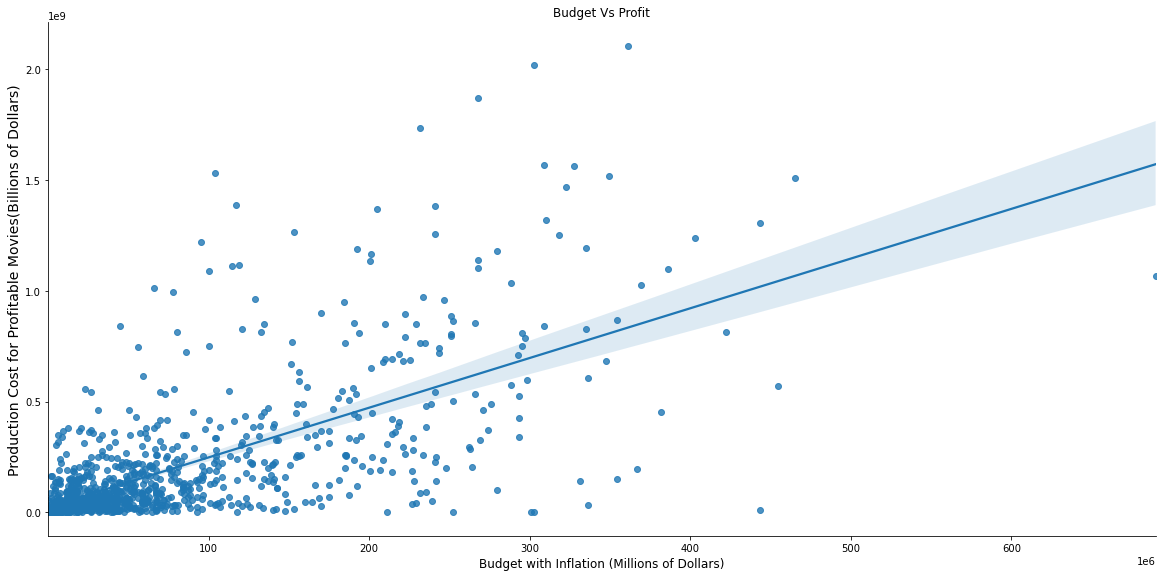

In [346]:
# Here you run your code to model the data
# Question 1 The most proftiable movies with inflation accounted for 
ax1 = sns.lmplot(x='inflation_budget', y ='profit_inflation_budget', data = most_profitable_movies, height = 8, aspect= 2 )
plt.title('Budget Vs Profit')
plt.xlabel('Budget with Inflation (Millions of Dollars)', fontsize = 12)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits = (6,6))
plt.ylabel('Production Cost for Profitable Movies(Billions of Dollars)', fontsize = 14)
plt.savefig('BudgetVsProfit');

This bar chart below indicates the budget used to make the most profitable movie. By comparing the profit (green) to the budget (black) on the graph down below we can see how drastic the profit margin can be. This will give a gauge on what budget is needed to make a highly profitable movie. 

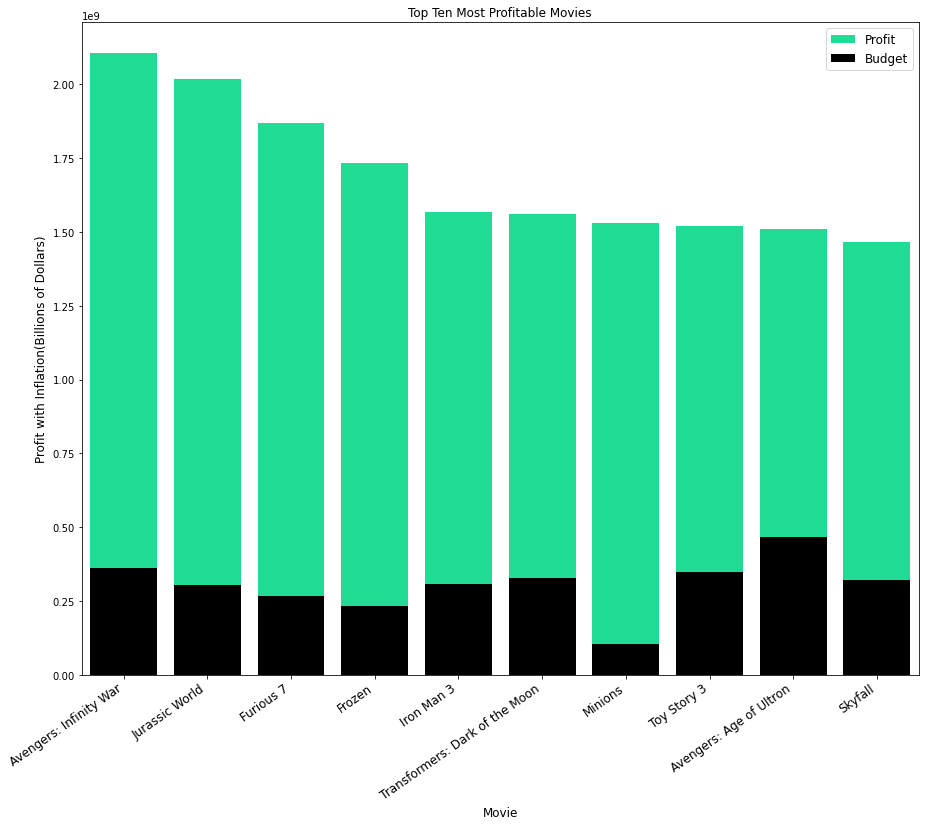

In [349]:
plt.figure(figsize = (15,12))
sns.barplot(x=most_profitable_movies.loc[0:9,'title'], y = most_profitable_movies.loc[0:10, 'profit_inflation_budget'],
           color = 'mediumspringgreen', label = 'Profit', ci = None)
sns.barplot(x= most_profitable_movies.loc[0:9,'title'], y = most_profitable_movies.loc[0:10, 'inflation_budget'],
          color= 'black', label= 'Budget', ci= None)
plt.title('Top Ten Most Profitable Movies')
plt.xlabel('Movie',fontsize = 12)
plt.ylabel('Profit with Inflation(Billions of Dollars)', fontsize = 12)
plt.xticks(rotation = 35, horizontalalignment = 'right', fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('tenmostprofitablemovies');


In [353]:
profitable_movies['inflation_budget'].describe()

count    9.800000e+02
mean     7.852486e+07
std      8.829700e+07
min      8.740000e+04
25%      1.761110e+07
50%      4.442500e+07
75%      1.047800e+08
max      6.898080e+08
Name: inflation_budget, dtype: float64

In [354]:
profitable_movies.loc[0:9, 'inflation_budget'].describe()

count    9.000000e+00
mean     4.436303e+08
std      1.030505e+08
min      3.311000e+08
25%      3.816000e+08
50%      4.433000e+08
75%      4.544800e+08
max      6.898080e+08
Name: inflation_budget, dtype: float64

In [355]:
profitable_movies['Profit_Margin'].describe()

count    980.000000
mean       0.627886
std        0.233273
min        0.000265
25%        0.492405
50%        0.677003
75%        0.805713
max        0.997599
Name: Profit_Margin, dtype: float64

In [356]:
profitable_movies.loc[0:9, 'Profit_Margin'].describe()

count    9.000000
mean     0.561992
std      0.256383
min      0.027506
25%      0.542645
50%      0.607331
75%      0.746413
max      0.853525
Name: Profit_Margin, dtype: float64

In [357]:
 len(most_profitable_movies.loc[most_profitable_movies['Profit_Margin']>0.5])
#Trying to see how many movies have a profit margin over 50%

731

Of the top ten most profitable movies, there is a median profit margin of 60%. The budget used on these movies had a median of $4.4 million. Avoided using the mean because did not want to be effected by the outliers. 

What studios produced the most successful movies? 


In [314]:
most_profitable_movies.head()

,index,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,1433854864,0.869606,302720000.0,2.018868e+09
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,1328722794,0.874895,267520000.0,1.870842e+09
3,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,1122469910,0.882119,231600000.0,1.733094e+09
4,30,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,BV,409000000.0,805800000,2013,1015392272,0.835444,308800000.0,1.567766e+09


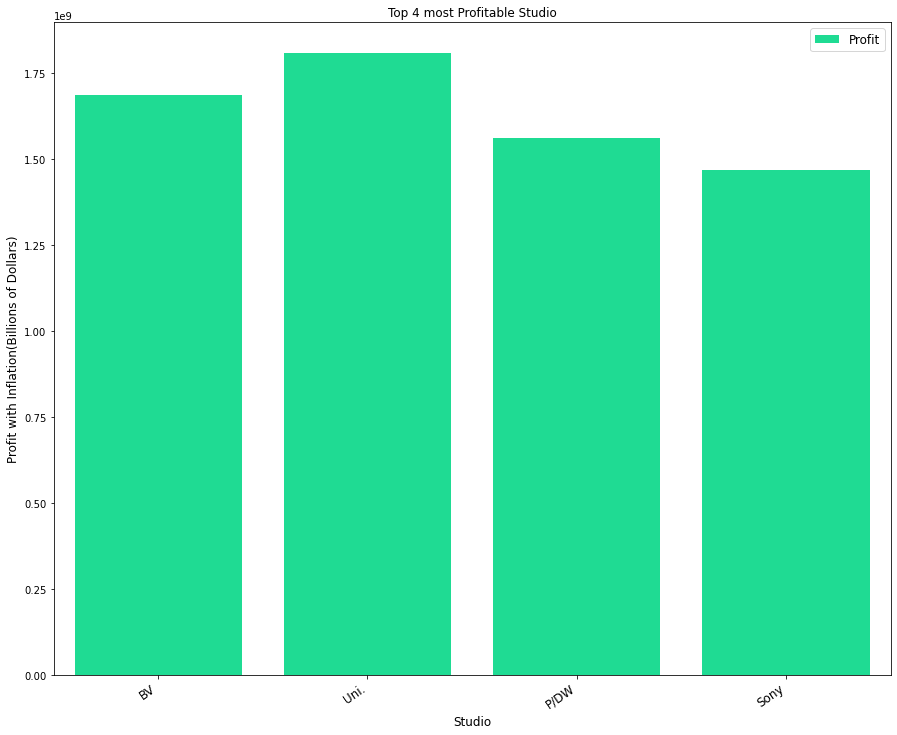

In [323]:
plt.figure(figsize = (15,12))
sns.barplot(y= most_profitable_movies.loc[0:9,'profit_inflation_budget'], x = most_profitable_movies.loc[0:10,'studio'],
           color = 'mediumspringgreen', label = 'Profit', ci = None)
plt.title('Top 4 Most Profitable Studio')
plt.xlabel('Studio',fontsize = 12)
plt.ylabel('Profit with Inflation(Billions of Dollars)', fontsize = 12)
plt.xticks(rotation = 35, horizontalalignment = 'right', fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('top4studios');



We reccommend using the top 4 studios best practices to model for the production for the movies in the new studio.

What genres produce the highest profit?

In [244]:
movie_budget_and_profit_df

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875,0.607331,689808000.0,1.066907e+09
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,465484800.0,1.509959e+09
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209,0.542645,381600000.0,4.527623e+08
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923,0.658944,422400000.0,8.161063e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,"Apr 27, 2012",Sound of My Voice,135000,408015,429448,FoxS,408000.0,NaN,2012,294448,0.685643,217620.0,4.746502e+05
1243,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,IFC,1600000.0,NaN,2012,2970593,0.961172,193440.0,4.788596e+06
1244,"Jul 10, 2015",The Gallows,100000,22764410,41656474,WB (NL),22800000.0,20200000,2015,41556474,0.997599,140800.0,5.851152e+07
1245,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,A24,1600000.0,NaN,2017,2669782,0.963896,127200.0,3.395963e+06


In [245]:
Imdb_movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [304]:
merged_on_title_df = most_profitable_movies.merge(Imdb_movies_df, on= 'title' )
merged_on_title_df.head()


,index,release_date_x,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,inflation_budget,profit_inflation_budget,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,...,361200000.0,2.104754e+09,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,...,302720000.0,2.018868e+09,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,6.6,14056
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,...,267520000.0,1.870842e+09,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,7.3,6538
3,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,...,231600000.0,1.733094e+09,[53],44363,en,Frozen,9.678,2010-02-05,5.8,987
4,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,...,231600000.0,1.733094e+09,"[16, 12, 10751]",109445,en,Frozen,26.183,2013-11-27,7.3,9767


In [305]:
Imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [306]:
genre_by_title = Imdb_title_basics_df.rename(columns = {'primary_title':'title'})
genre_by_title.head(3)

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [307]:
merged_on_title_df.head(3)

,index,release_date_x,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,inflation_budget,profit_inflation_budget,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,...,361200000.0,2.104754e+09,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,...,302720000.0,2.018868e+09,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,6.6,14056
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,...,267520000.0,1.870842e+09,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,7.3,6538


In [308]:
genre_by_title.head(3)

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [309]:
genre_with_profit = merged_on_title_df.merge(genre_by_title, on= 'title' )
genre_with_profit.head(5)


,index,release_date_x,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,original_title_x,popularity,release_date_y,vote_average,vote_count,tconst,original_title_y,start_year,runtime_minutes,genres
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,...,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,...,Jurassic World,20.709,2015-06-12,6.6,14056,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,...,Furious 7,20.396,2015-04-03,7.3,6538,tt2820852,Furious Seven,2015,137.0,"Action,Crime,Thriller"
3,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,...,Frozen,9.678,2010-02-05,5.8,987,tt1323045,Frozen,2010,93.0,"Adventure,Drama,Sport"
4,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,...,Frozen,9.678,2010-02-05,5.8,987,tt1611845,Wai nei chung ching,2010,92.0,"Fantasy,Romance"


In [358]:
most_profitable_movies.head()

,index,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,361200000.0,2.104754e+09
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,1433854864,0.869606,302720000.0,2.018868e+09
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,1328722794,0.874895,267520000.0,1.870842e+09
3,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,1122469910,0.882119,231600000.0,1.733094e+09
4,30,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,BV,409000000.0,805800000,2013,1015392272,0.835444,308800000.0,1.567766e+09


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

First, recommendation is to make movies series based movies focus on a younger audience. This will be the beginning base of a dedicated audience to grow even  deeper with future movies releases. Genres---- 

The most profitable movies show clear impressive profit margins even with inflation being counted for. The most profitable movies are Avengers:Infinity War, Jurassic World and Furious 7. 



Considering that two of these movies are part of a series of movies that have been produced over a set amount of time with a dedicated fan base. Which can be left to assumption that a lot of the profit margin is from an already dedicated fan base. By starting off with a movie that has a universe where we can create a dedicated fan base that spans an entire universe large enough to grow a large diverse character set. 

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***